<a href="https://colab.research.google.com/github/hid30/Aplikasi-Login/blob/main/ILT_3_01_Clustering_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Lab
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

## Data Exploration

In [ ]:
# Membaca dataset dari URL (Google Drive) dan menyimpannya dalam DataFrame
df = pd.read_csv('https://drive.google.com/uc?id=19903lXYiKFUwB6oVn8tWFL4KsraZ0y-p')

# Menampilkan 5 baris pertama dari dataset untuk melihat gambaran umum data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset (baris, kolom)
df.shape

(200, 5)

In [ ]:
# Menampilkan statistik deskriptif dari kolom numerik, seperti mean, min, max, dll.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
# Menghitung jumlah missing values pada setiap kolom
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Data Visualization

In [ ]:
# Mengatur gaya visualisasi dengan tema 'fivethirtyeight'
# https://matplotlib.org/stable/gallery/style_sheets/index.html
# https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

### Histograms

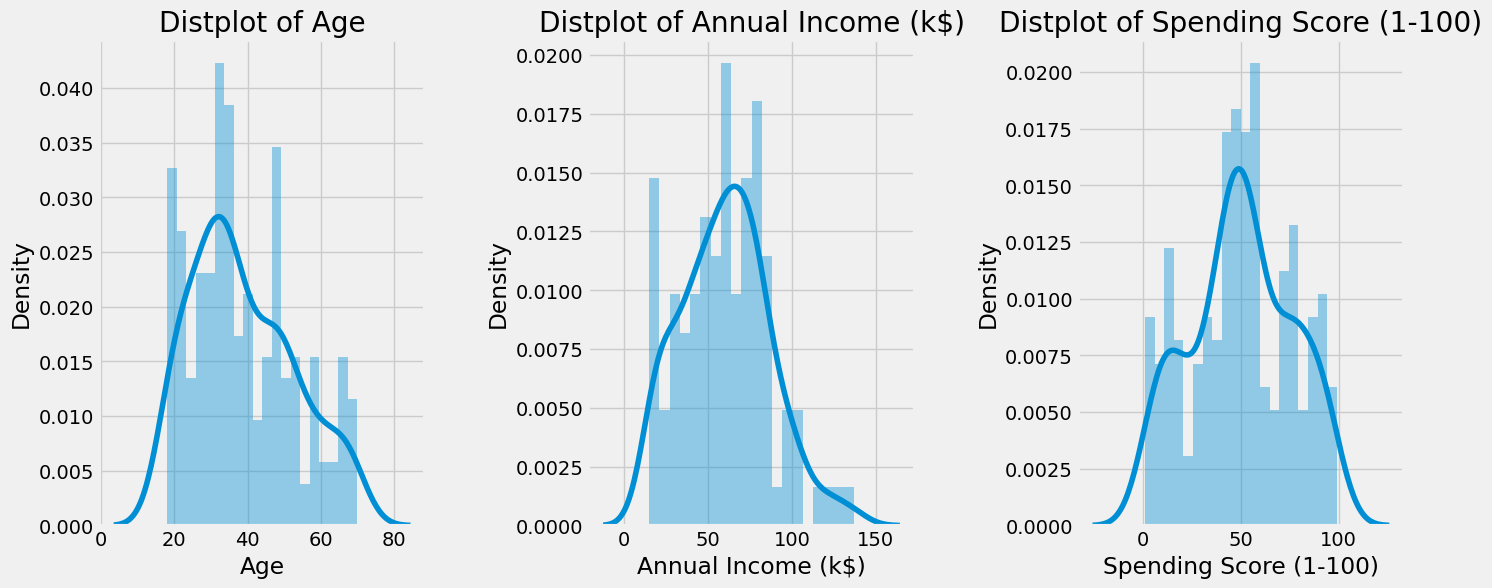

In [ ]:
# Membuat sebuah figure dengan ukuran lebar 15 dan tinggi 6 inci
plt.figure(1, figsize=(15,6))

# Inisialisasi variabel n untuk menghitung jumlah subplot
n = 0

# Melakukan perulangan untuk menampilkan distribusi dari tiga fitur numerik
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)                            # Membuat subplot dalam satu baris dengan 3 kolom
    plt.subplots_adjust(hspace=0.5, wspace=0.5)   # Mengatur jarak antar subplot secara horizontal dan vertikal
    sns.distplot(df[x], bins=20)                  # Membuat distribusi plot (histogram + Kernel Density Estimation) untuk kolom x
    plt.title('Distplot of {}'.format(x))         # Memberikan judul pada masing-masing subplot

# Menampilkan seluruh plot
plt.show()

Grafik di atas menunjukkan sebaran (distribusi) dari tiga aspek utama pelanggan:

1. **Usia (Age)**. Sebagian besar pelanggan berusia antara 20 sampai 40 tahun, dengan jumlah yang menurun pada usia yang lebih tua. Artinya, mayoritas pelanggan berada di kelompok usia produktif.

2. **Pendapatan Tahunan (Annual Income)**. Distribusi pendapatan terlihat terkonsentrasi di sekitar 40 hingga 80 ribu dolar per tahun. Artinya, sebagian besar pelanggan berada di kelas menengah.

3. **Skor Pengeluaran (Spending Score)**. Skor pengeluaran tersebar luas, namun terlihat ada dua kelompok besar: satu dengan skor rendah (hemat) dan satu lagi dengan skor tinggi (boros). Ini menunjukkan adanya variasi pola belanja yang bisa jadi dasar untuk membagi pelanggan menjadi segmen-segmen berbeda.

### Count Plot of Gender

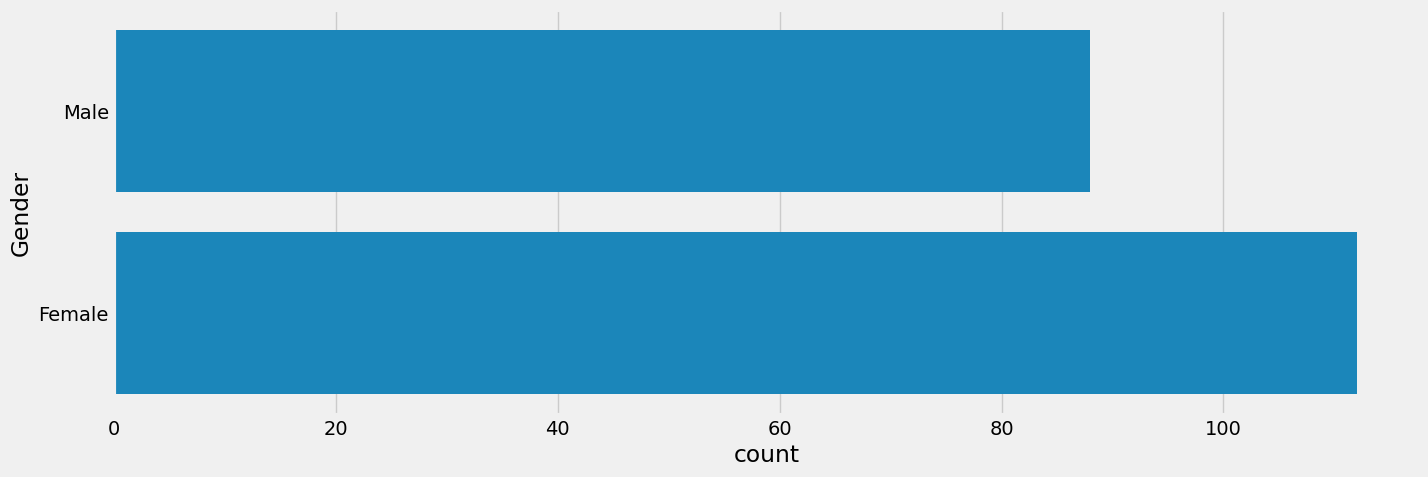

In [ ]:
# Membuat sebuah figure (kanvas untuk plot) dengan ukuran lebar 15 dan tinggi 5 inci
plt.figure(1, figsize=(15,5))

# Membuat count plot (diagram batang) untuk menghitung jumlah data berdasarkan kategori 'Gender'
sns.countplot(y='Gender', data=df)

# Menampilkan plot
plt.show()

Secara umum, grafik di atas menunjukkan jumlah pelanggan berdasarkan gender (jenis kelamin).

* Sumbu Y menunjukkan kategori gender: Female (Perempuan) dan Male (Laki-laki).
* Sumbu X menunjukkan jumlah pelanggan (count).
* Jumlah pelanggan perempuan lebih banyak dibandingkan pelanggan laki-laki dalam dataset ini.

Ini bisa menjadi informasi awal yang berguna saat melakukan analisis kluster pelanggan, karena perbedaan jumlah pelanggan berdasarkan gender dapat memengaruhi strategi pemasaran, personalisasi produk, atau layanan yang diberikan.

### Ploting the Relation between Age, Annual Income and Spending Score

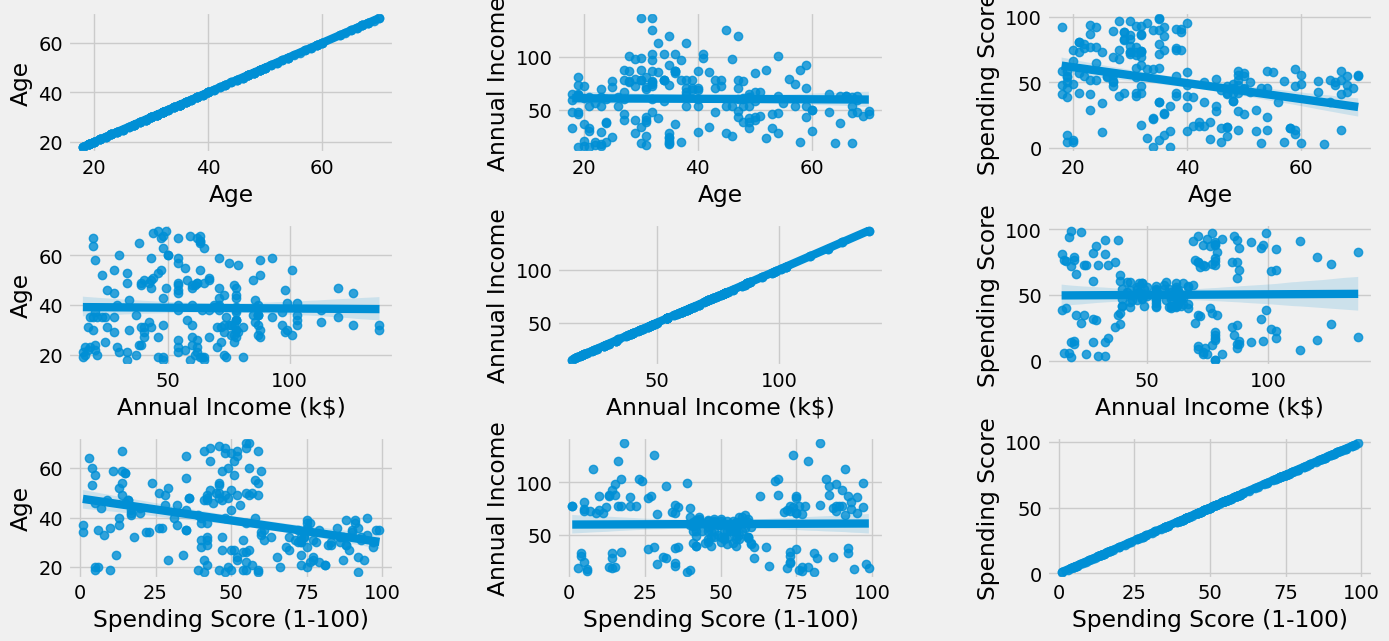

In [ ]:
# Membuat sebuah figure dengan ukuran lebar 15 dan tinggi 7 inci
plt.figure(1, figsize=(15,7))

# Inisialisasi variabel n untuk menghitung jumlah subplot
n = 0

# Melakukan perulangan kombinasi antara ketiga fitur numerik untuk plot pasangan (pairwise)
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)          # Membuat scatter plot dengan garis regresi
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Grafik di atas menunjukkan hubungan antar fitur numerik dalam dataset. Setiap sel menampilkan hubungan dua variabel, dengan garis regresi untuk membantu melihat arah kecenderungan.

Interpretasi Umum Tiap Kombinasi Variabel:
1. **Age vs Annual Income**. Titik-titik tersebar secara acak tanpa pola yang jelas.Tidak ada korelasi yang kuat antara usia dan pendapatan. Orang tua maupun muda bisa memiliki pendapatan beragam.
2. **Age vs Spending Score**. Terlihat sedikit kecenderungan negatif: semakin tua, cenderung skor pengeluarannya lebih rendah. Tapi tidak terlalu signifikan, karena penyebaran datanya masih cukup acak.
3. **Annual Income vs Spending Score**. Titik-titik tampak membentuk dua kelompok besar (mungkin akan terlihat jelas jika dilakukan clustering). Tidak terlihat korelasi linier yang kuat—orang dengan pendapatan tinggi belum tentu punya skor pengeluaran tinggi, dan sebaliknya.


### Age vs Annual Income with respect to Gender

Untuk menunjukkan hubungan antara usia dan pendapatan tahunan berdasarkan jenis kelamin. Grafik ini membandingkan pola antara laki-laki (biru) dan perempuan (merah muda).

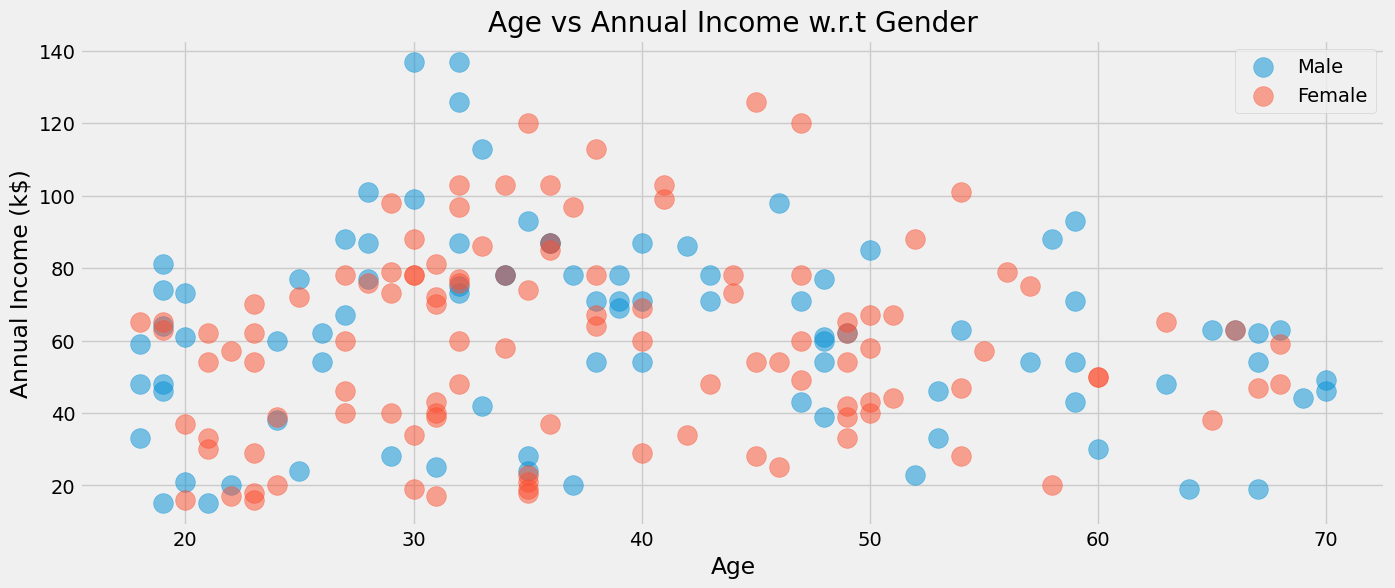

In [ ]:
plt.figure(1, figsize=(15,6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Grafik di atas menunjukkan bahwa baik pria maupun wanita memiliki pola sebaran usia dan pendapatan yang relatif mirip. Tidak ada perbedaan mencolok yang menunjukkan satu gender memiliki penghasilan lebih tinggi secara konsisten pada usia tertentu.

### Annual Income vs Spending Score with respect to Gender
Untuk menunjukkan hubungan pendapatan tahunan dan kor pengeluaran berdasarkan jenis kelamin. Grafik ini membandingkan pola antara laki-laki (biru) dan perempuan (merah muda).

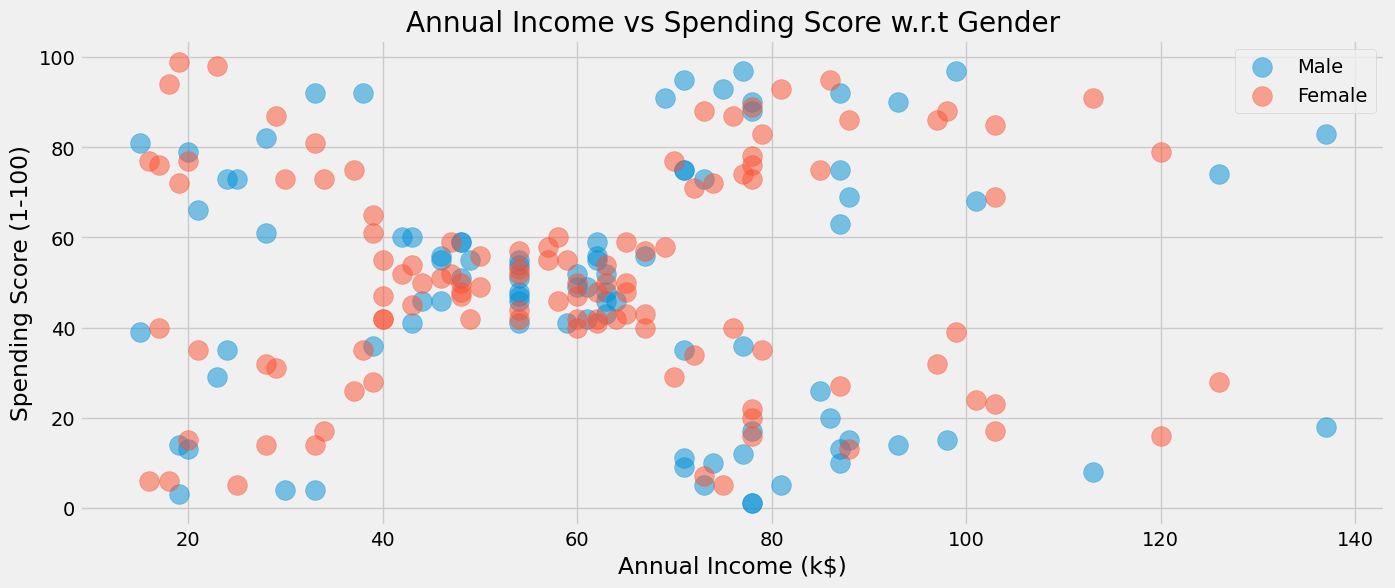

In [ ]:
plt.figure(1, figsize=(15,6))

for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Grafik di atas menunjukkan bahwa tidak terdapat hubungan yang jelas antara pendapatan dan skor pengeluaran, baik pada pria maupun wanita. Pola belanja keduanya tampak bervariasi dan tersebar merata di seluruh rentang pendapatan.

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [ ]:
'''Age and spending Score'''
# Mengambil dua fitur dari dataset, yaitu 'Age' dan 'Spending Score (1-100)', lalu menyimpannya dalam variabel X1
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

# Membuat list kosong untuk menyimpan nilai inertia dari setiap jumlah cluster
# inertia adalah total jarak kuadrat antara titik data dan pusat klasternya — semakin kecil nilainya, semakin baik klaster terbentuk
inertia = []

# Melakukan iterasi untuk mencoba jumlah klaster dari 1 hingga 10
for n in range(1 , 11):
    algorithm = (KMeans(
        n_clusters = n,     # jumlah klaster yang dicoba
        init='k-means++',   # metode inisialisasi centroid agar cepat konvergen
        n_init = 10,        # menjalankan K-Means sebanyak 10 kali dengan inisialisasi berbeda
        max_iter=300,       # maksimum iterasi untuk satu kali run
        tol=0.0001,         # toleransi konvergensi
        random_state=111,   # untuk hasil yang konsisten
        algorithm='elkan')  # algoritma K-Means yang lebih cepat untuk data berdimensi rendah
    )

    algorithm.fit(X1)                    # Melatih model K-Means pada data X1
    inertia.append(algorithm.inertia_)   # Menyimpan nilai inertia untuk jumlah klaster n

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

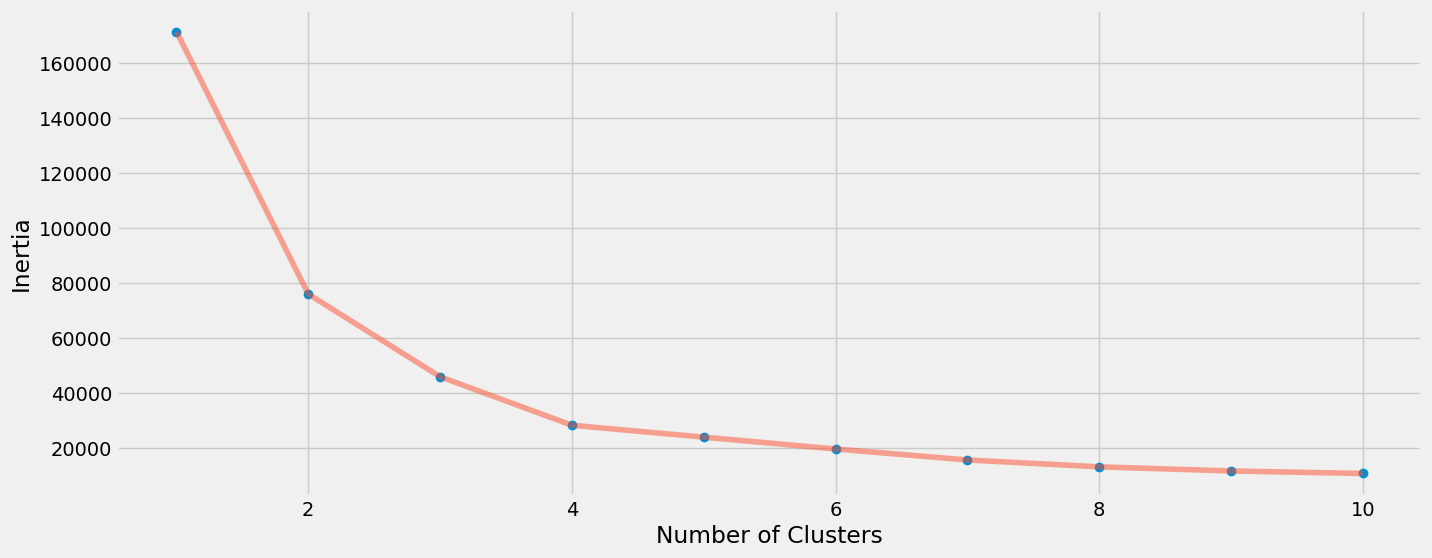

In [ ]:
# Untuk menampilkan Elbow Method, yaitu grafik yang membantu menentukan jumlah klaster optimal.
plt.figure(1, figsize=(15 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Grafik di atas menunjukkan hasil elbow method untuk menentukan jumlah klaster optimal. Jumlah klaster optimal berada di angka 3 atau 4, karena setelah titik tersebut penurunan inertia tidak signifikan lagi.

In [ ]:
algorithm = (KMeans(
    n_clusters=4,            # Jumlah klaster yang dipilih berdasarkan hasil elbow (4 klaster)
    init='k-means++',
    n_init = 10,
    max_iter=300,
    tol=0.0001,
    random_state= 111,
    algorithm='elkan') )

# Melatih model K-Means pada data X1
algorithm.fit(X1)

# Menyimpan hasil label klaster untuk setiap data. Setiap baris data diberi label 0, 1, 2, atau 3 sesuai klaster tempatnya masuk.
labels1 = algorithm.labels_

# Menyimpan koordinat titik pusat klaster (centroid) yang ditemukan oleh K-Means.
# Akan terdiri dari 4 titik (karena 4 klaster), masing-masing mewakili rata-rata posisi anggota klaster di ruang fitur Age vs Spending Score.
centroids1 = algorithm.cluster_centers_

Menyiapkan area decision boundary dari model K-Means yang telah dilatih sebelumnya. Dengan kata lain, kita ingin memvisualisasikan pembagian wilayah tiap klaster di ruang dua dimensi (Age vs Spending Score).

In [ ]:
# Menentukan resolusi grid (jarak antar titik dalam meshgrid), semakin kecil nilai h, semakin halus hasil plot-nya
h = 0.02

# Menentukan batas minimum dan maksimum sumbu X (yaitu fitur 'Age')
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1

# Menentukan batas minimum dan maksimum sumbu Y (yaitu fitur 'Spending Score')
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

# Membuat grid 2D dari seluruh kombinasi nilai X dan Y dalam rentang tersebut
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Menggunakan model K-Means untuk memprediksi label klaster dari setiap titik dalam grid
# np.c_ menggabungkan nilai xx dan yy menjadi pasangan koordinat (Age, Spending Score)
# .ravel() mengubah array 2D menjadi 1D agar bisa digabungkan
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

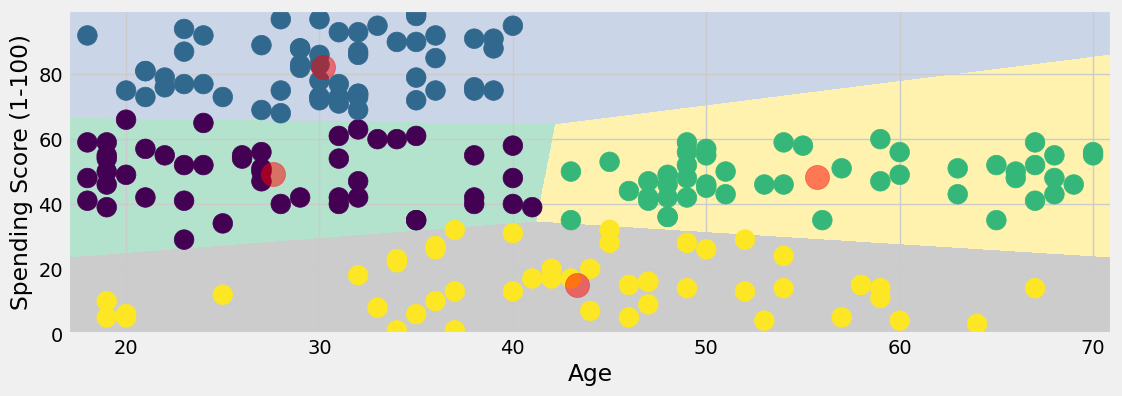

In [ ]:
plt.figure(1, figsize=(12,4))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Grafik di atas menunjukkan hasil segmentasi pelanggan ke dalam 4 klaster berdasarkan umur (Age) dan skor pengeluaran (Spending Score). Klaster ini menunjukkan bahwa pelanggan dapat dibedakan bukan hanya dari usia, tapi juga dari pola belanjanya.

* Klaster 1 (biru) berisi pelanggan usia muda dengan skor pengeluaran tinggi. Mereka cenderung impulsif dan cocok untuk strategi promosi atau diskon.
* Klaster 2 (ungu) terdiri dari pelanggan usia muda hingga menengah dengan pengeluaran sedang. Mereka cukup aktif dan potensial untuk ditingkatkan loyalitasnya.
* Klaster 3 (hijau) mencakup pelanggan usia tua dengan pengeluaran sedang. Mereka lebih stabil dan selektif, cocok untuk layanan yang nyaman dan berkualitas.
* Klaster 4 (kuning) adalah pelanggan dari berbagai usia dengan pengeluaran rendah. Mereka kurang aktif dan bisa ditargetkan dengan edukasi atau penawaran khusus.


### 2. Segmentation using  Annual Income and Spending Score

In [ ]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

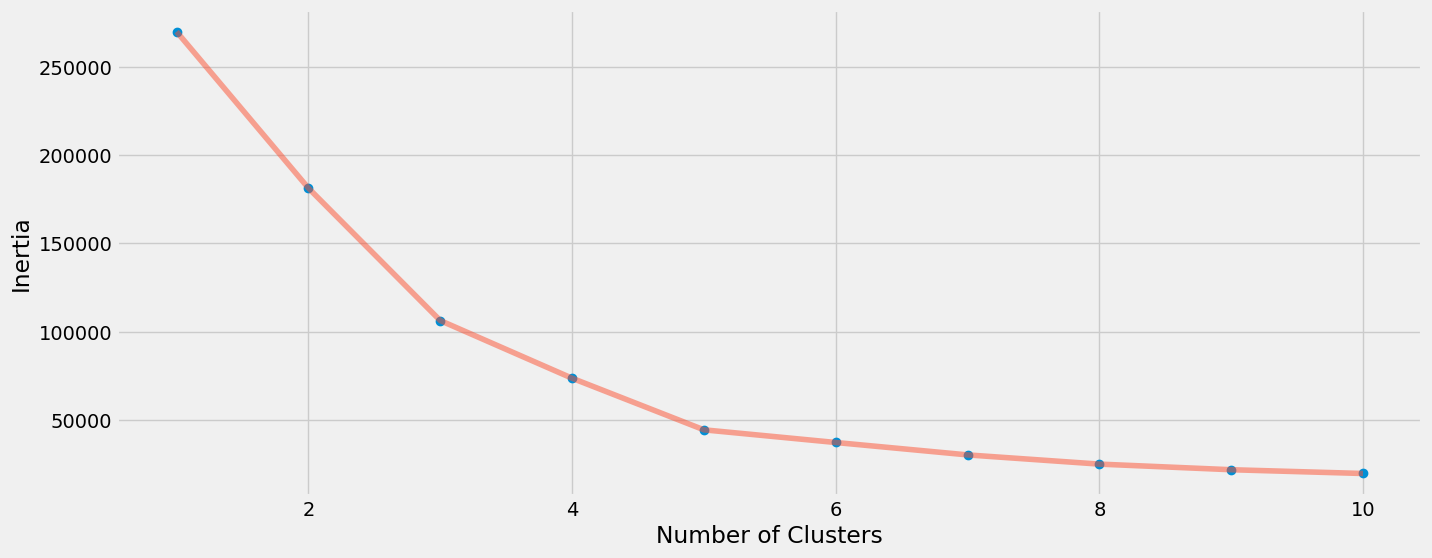

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

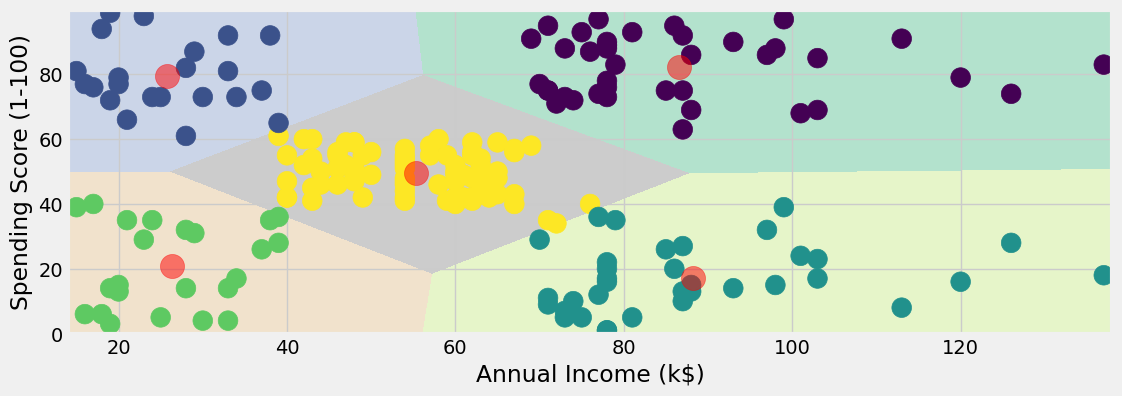

In [ ]:
plt.figure(1, figsize=(12,4))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Grafik di atas menunjukkan hasil segmentasi pelanggan ke dalam 5 klaster berdasarkan pendapatan tahunan (Annual Income) dan skor pengeluaran (Spending Score). Klaster ini menunjukkan bahwa pelanggan memiliki perilaku belanja yang berbeda meskipun berada pada tingkat pendapatan yang sama.

* Klaster 1 (biru tua) berisi pelanggan dengan pendapatan rendah namun skor pengeluaran tinggi. Mereka cenderung sangat aktif berbelanja meskipun memiliki penghasilan terbatas. Klaster ini cocok ditargetkan dengan promo hemat dan program loyalitas.

* Klaster 2 (ungu) mencakup pelanggan dengan pendapatan tinggi dan skor pengeluaran tinggi. Mereka adalah pelanggan premium yang potensial, cocok untuk produk eksklusif atau layanan personalisasi.

* Klaster 3 (kuning) merupakan pelanggan dengan pendapatan menengah dan pengeluaran sedang. Mereka adalah segmen yang stabil dan cocok untuk penawaran reguler yang menjaga loyalitas.

* Klaster 4 (hijau muda) terdiri dari pelanggan dengan pendapatan rendah dan pengeluaran rendah. Mereka kurang aktif dan bisa ditargetkan dengan strategi edukasi atau insentif awal.

* Klaster 5 (hijau tua) adalah pelanggan dengan pendapatan tinggi namun pengeluaran rendah. Mereka memiliki daya beli tinggi tetapi belum dimaksimalkan, sehingga dapat ditarik dengan pendekatan personal atau penawaran eksklusif.

### 3.Segmentation using Age , Annual Income and Spending Score

In [ ]:
X3 = df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

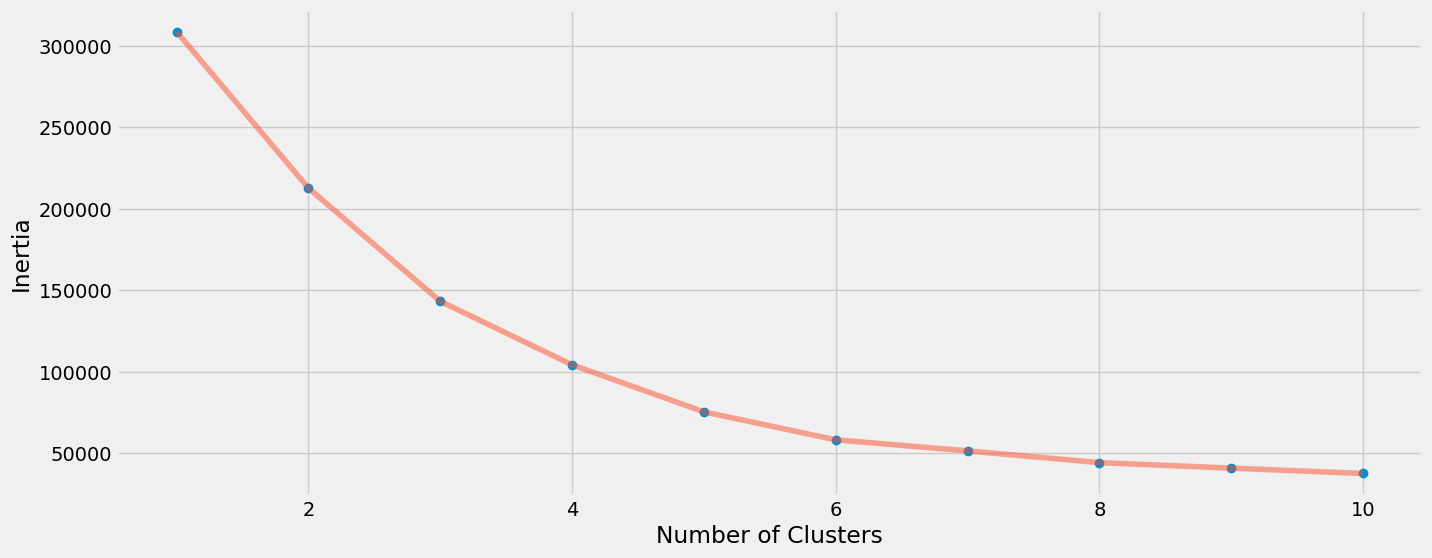

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")